In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import sklearn
import os
import sys
import time
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow import keras
# print(tf.__version__)
# print(sys.version_info)
# for module in mpl,np,pd,sklearn,tf,keras:
#     print(module.__name__, module.__version__)

In [3]:
fashion_minist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_minist.load_data()
x_vaild, x_train = x_train_all[:5000], x_train_all[5000:]
y_vaild, y_train = y_train_all[:5000], y_train_all[5000:]
print(x_vaild.shape, y_vaild.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_vaild = scaler.fit_transform(x_vaild.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_test = scaler.fit_transform(x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)

In [7]:
# 使用tf.keras.sequential构建模型
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
for _ in range(9):
    model.add(keras.layers.Dense(100,activation='relu'))
    model.add(keras.layers.BatchNormalization())
    """
    将匹归一化放在激活函数之前的实现
    model.add(keras.layers.Dense(100))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation('relu))
    """
    
model.add(keras.layers.Dense(100,activation='tanh'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',
             metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)               78500     
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dense_12 (Dense)             (None, 100)               10100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_13 (Dense)             (None, 100)               10100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)              

In [9]:
# Tensorboard , earlystopping 
logdir = './bn-callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)

output_model_file = os.path.join(logdir,"fashion_minist_model.h5")
callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,save_best_only=True),
    keras.callbacks.EarlyStopping(patience=5, min_delta = 1e-3)
]
history = model.fit(x_train,y_train,epochs=50,validation_data=(x_vaild,y_vaild),callbacks = callbacks)

Train on 55000 samples, validate on 5000 samples
Epoch 1/50
55000/55000 [==============================] - 18s 324us/sample - loss: 0.7300 - accuracy: 0.7433 - val_loss: 0.4352 - val_accuracy: 0.8448
Epoch 2/50
55000/55000 [==============================] - 10s 185us/sample - loss: 0.5211 - accuracy: 0.8151 - val_loss: 0.4026 - val_accuracy: 0.8582
Epoch 3/50
55000/55000 [==============================] - 10s 189us/sample - loss: 0.4654 - accuracy: 0.8351 - val_loss: 0.3789 - val_accuracy: 0.8688
Epoch 4/50
55000/55000 [==============================] - 11s 192us/sample - loss: 0.4267 - accuracy: 0.8485 - val_loss: 0.3588 - val_accuracy: 0.8752
Epoch 5/50
55000/55000 [==============================] - 10s 190us/sample - loss: 0.4060 - accuracy: 0.8541 - val_loss: 0.3558 - val_accuracy: 0.8740
Epoch 6/50
55000/55000 [==============================] - 11s 196us/sample - loss: 0.3842 - accuracy: 0.8639 - val_loss: 0.3491 - val_accuracy: 0.8722
Epoch 7/50
55000/55000 [=====================

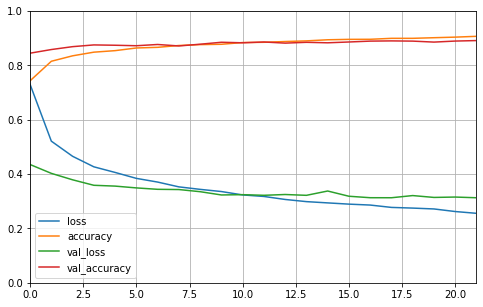

In [10]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize = (8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curves(history)